In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import torch 
import torch.nn as nn 
import torch.nn.functional as F 
import torch.optim as optim 
import torch.utils.data as utils

In [3]:
modeldict 

NameError: name 'modeldict' is not defined

In [3]:
class model_result():
    
    def __init__(self, prefix, aetype):
        self.sigloss = np.load(prefix+'_sigloss.npy')
        self.bkgloss = np.load(prefix+'_bkgloss.npy')
        self.aetype = aetype
        
    def get_tpr_fpr(self):
        bins = np.linspace(0,50,1001)
        tpr = []
        fpr = []
        for cut in bins:
            if self.aetype == 'sig':
                tpr.append(np.where(self.sigloss<cut)[0].shape[0]/len(self.sigloss))
                fpr.append(np.where(self.bkgloss<cut)[0].shape[0]/len(self.bkgloss))
            if self.aetype == 'bkg':
                tpr.append(np.where(self.sigloss>cut)[0].shape[0]/len(self.sigloss))
                fpr.append(np.where(self.bkgloss>cut)[0].shape[0]/len(self.bkgloss))
        
        return tpr,fpr
    
    def get_precision_recall(self):
        bins = np.linspace(0,100,1001)
        tpr = []
        fpr = []
        precision = []
        for cut in bins:
            if self.aetype == 'sig':
                tpr.append(np.where(self.sigloss<cut)[0].shape[0]/len(self.sigloss))
                precision.append((np.where(self.sigloss<cut)[0].shape[0])/(np.where(self.bkgloss<cut)[0].shape[0]+np.where(self.sigloss<cut)[0].shape[0]))
            
            if self.aetype == 'bkg':
                tpr.append(np.where(self.sigloss>cut)[0].shape[0]/len(self.sigloss))
                precision.append((np.where(self.sigloss>cut)[0].shape[0])/(np.where(self.bkgloss>cut)[0].shape[0]+np.where(self.sigloss>cut)[0].shape[0]))
        return precision,tpr  

        

In [9]:
VAE_bkg = model_result('VanillaVAE__bkgAE','bkg')
planarflow_bkg = model_result('NFLOWVAE_PlanarNEW','bkg')
radialflow_bkg = model_result('NFLOWVAE_Radial','bkg')

In [7]:
VAE_bkg_tpr, VAE_bkg_fpr = VAE_bkg.get_tpr_fpr()
nflow_bkg_Planar_tpr, nflow_bkg_Planar_fpr = planarflow_bkg.get_tpr_fpr()
nflow_bkg_Radial_tpr, nflow_bkg_Radial_fpr = radialflow_bkg.get_tpr_fpr()

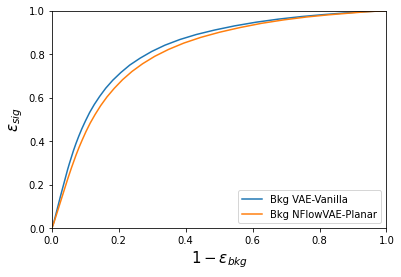

In [8]:
#plt.plot(sig_fpr,sig_tpr,label='Sig Autoencoder trained on complete signal')
#plt.plot(sig_tau21cut_fpr,sig_tau21cut_tpr,label='Sig Autoencoder trained on signal with tau cut')
#plt.plot(bkg_fpr,bkg_tpr,label='Bkg Autoencoder')
plt.plot(VAE_bkg_fpr,VAE_bkg_tpr,label='Bkg VAE-Vanilla')
plt.plot(nflow_bkg_Planar_fpr,nflow_bkg_Planar_tpr,label='Bkg NFlowVAE-Planar')
#plt.plot(nflow_bkg_Radial_fpr,nflow_bkg_Radial_tpr,label='Bkg NFlowVAE-Radial')

#plt.plot(twod_fpr,twod_tpr,'bo',label='AE 2dscan',markersize=2)
#plt.plot(twod_nflowbkg_fpr,twod_nflowbkg_tpr,'bo',label='AE 2dscan',markersize=2,alpha=0.7)
#plt.plot(twod_nflowbkg_tau21sig_fpr, twod_nflowbkg_tau21sig_tpr,'ro',label='2dscan with cut signal',markersize=2,alpha=0.7)
#plt.plot(points[hull1.vertices[2:],0], points[hull1.vertices[2:],1], 'b--', lw=2,label='2dscan with complete signal')
#plt.plot(points2[hull2.vertices[2:],0], points2[hull2.vertices[2:],1], 'r--', lw=2,label='2dscan with incomplete signal')

#plt.plot(fpr,tpr,label='Supervised')
plt.xlabel(r'$1-\epsilon_{bkg}$',fontsize=15)
plt.ylabel(r'$\epsilon_{sig}$',fontsize=15)
#plt.semilogy()
plt.legend(loc='lower right')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.savefig('ROC_Curve.png')

In [17]:
VAE_bkg_precision, VAE_bkg_recall = VAE_bkg.get_precision_recall()
nflow_bkg_Planar_precision, nflow_bkg_Planar_recall = planarflow_bkg.get_precision_recall()
nflow_bkg_Radial_precision, nflow_bkg_Radial_recall = radialflow_bkg.get_precision_recall()

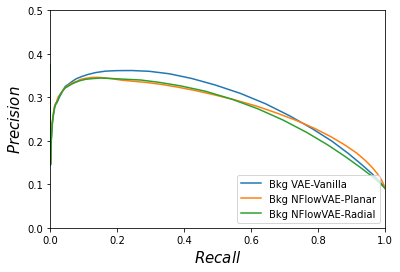

In [18]:
#plt.plot(sig_fpr,sig_tpr,label='Sig Autoencoder trained on complete signal')
#plt.plot(sig_tau21cut_fpr,sig_tau21cut_tpr,label='Sig Autoencoder trained on signal with tau cut')
#plt.plot(bkg_fpr,bkg_tpr,label='Bkg Autoencoder')
plt.plot(VAE_bkg_recall,VAE_bkg_precision,label='Bkg VAE-Vanilla')
plt.plot(nflow_bkg_Planar_recall,nflow_bkg_Planar_precision,label='Bkg NFlowVAE-Planar')
plt.plot(nflow_bkg_Radial_recall,nflow_bkg_Radial_precision,label='Bkg NFlowVAE-Radial')

#plt.plot(twod_fpr,twod_tpr,'bo',label='AE 2dscan',markersize=2)
#plt.plot(twod_nflowbkg_fpr,twod_nflowbkg_tpr,'bo',label='AE 2dscan',markersize=2,alpha=0.7)
#plt.plot(twod_nflowbkg_tau21sig_fpr, twod_nflowbkg_tau21sig_tpr,'ro',label='2dscan with cut signal',markersize=2,alpha=0.7)
#plt.plot(points[hull1.vertices[2:],0], points[hull1.vertices[2:],1], 'b--', lw=2,label='2dscan with complete signal')
#plt.plot(points2[hull2.vertices[2:],0], points2[hull2.vertices[2:],1], 'r--', lw=2,label='2dscan with incomplete signal')

#plt.plot(fpr,tpr,label='Supervised')
plt.xlabel('$Recall$',fontsize=15)
plt.ylabel('$Precision$',fontsize=15)
#plt.semilogy()
plt.legend(loc='lower right')
plt.xlim([0.0,1.0])
plt.ylim([0.0,0.5])
plt.savefig('PR_Curve.png')